#**Projeto end-to-end League of Legends - Prevendo o resultado de partidas de League of Legends**



Esse é um projeto definido como end-to-end, ou melhor, um projeto de ponta a ponta, e essa é uma das melhores formas de colocar em prática os ensinamentos aprendidos dento da ciência de dados. 

O objetivo desse projeto é que seja possivel de prever partidas de league of legends, ou mais especificamente, as chances de quem está no lado azul vencer, na seleção de campeões, antes mesmo de iniciar uma partida, e que de alguma forma o jogador possa usar esse projeto antes de iniciar uma partida, para saber as suas chances de vitória. Como ideia inicial, isso poderá ser feito através da biblioteca Streamlit, onde o usuario irá escolher as variavies de entrada do modelo, de acordo com a seleção de campeõs da sua partida, e obter o resultado da váriavel de saída, sendo vitória ou derrota.

---



Agora, *deixa eu me apresentar, que eu acabei de chegar, depois que ler esse projeto, você vai lembrar meu nome* (brincadeiras a parte), me chamo Luis Vinicius, também conhecido como Tito, e tenhos 20 anos. 

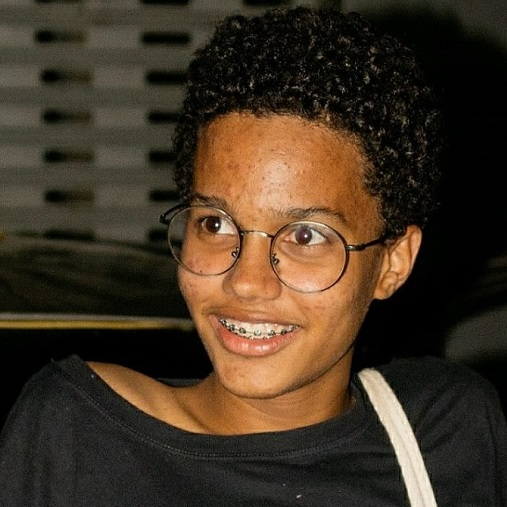



---



Dessa forma, as etapas que neste projeto seram construídas, com o objetivo de não só construir uma solução, porém também aprender mais sobre os tópicos que serão vistos, são elas:

### **Etapas do projeto**

* Entendimento do Problema

* Coleta do dados 
   1. Kaggle (Jogos classificados de diamantes de League of Legends)
   2. Entendimento do contexto dos dados

* Manipulação e preparação dos dados
    1. Verificar dados ausentes
    2. Verificar o tipo das colunas
    3. Deletar colunas
    4. Verificar dados duplicados
    5. Verificar dados desbalanceados
    6. Outliers
  
* Exploração e visualização dos dados
1.   Teste de Hipoteses (tirar talvez)


* Modelagem e Avaliação de Modelos (Aplicar o melhor modelo para o problema e avalia-lo)

1.   Seleção de Variaveis
2.   Feature Eng
3.   AutoML
4.   Escolha do Algoritmo e Explicação do Algoritmo
5.   Metricas de avaliação para classificação 

* Deploy (Verificar aula salva no drive do MinerandoDados)



## **Entendimento do Problema**

Historicamente, o lado azul tem um winrate incrivelmente alto em League of Legends. Na Fase de Grupos do Mundial de 2016, que não teve seed ou escolha de lados, o lado azul teve um winrate de 60%. Equipes optam pelo lado azul em parte por conta das vantagens de terreno, para ganks ou divings na rota inferior para circundar o acampamento dos krugs.

A rota mais curta e o acesso fácil ao Azul também permitem que o time impeça que o midlaner inimigo tenha a habilidade de constantemente "spammar" feitiços se conseguirem avançar mais no lado azul na rota inferior.

Por esse motivo, nossa variavel alvo acaba sendo o lado de escolha dos times na partida. A coluna blueWins é o valor alvo (o valor que estamos tentando prever, o valor 1 significa que o time azul venceu. 0 caso contrário.

###**O nosso problema de classificação**

O nosso problema trata-se de um problema mais básico de classificação, que envolve duas classes, que podemos chamar de classe positiva e classe negativa (o que significa ser positivo ou negativo depende da semântica do problema).

E esse tipo de tarefa é chamada de classificação binária. Por exemplo, temos a tarefa de classificar nossos dados em duas classes: vitória do time azul ou derrota. Nesse cenário, como estamos interessados em encontrar as chances de "vitória do time azul", pode ser interessante considerar a classe positiva como sendo as "vitórias do time azul", enquanto a classe de derrotas é considerada negativa.

Entenda que, a partir de um ponto de vista geométrico, o problema da classificação pode ser visto como a tarefa de se traçar fronteiras de decisão (decision boundaries) entre as regiões que caracterizam cada classe. Um novo ponto é classificado observando a classe da região onde ele se encontra.

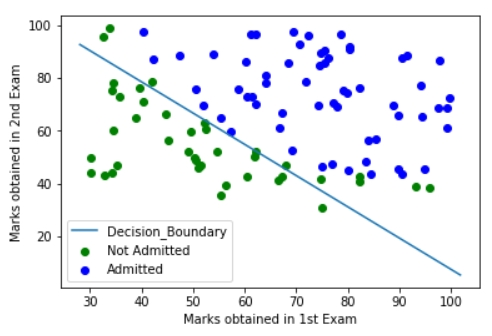

Observe, que a imagem está representando duas classes, uma verde e outra azul, e isso poderia se encaixar facilmente no nosso problema de vitória ou derrota do time azul. O que o classificador fez foi traçar a fronteira de decisão, representada na figura pela linha azul, entre as duas classes, separando o espaço de features em duas regiões.

Finalizando o entendimento, para o classificador, todos os pontos acima da fronteira (linha azul) são considerados como sendo da classe azul, enquanto todos os pontos abaixo da fronteira são considerados como sendo da classe verde. Porém, note como alguns pontos verdes encontram-se acima da fronteira e isso acontece, obviamente, porque o classificador comete erros.

Para cada diferente tipo de acerto e erro, um classificador recebe um nome e podemos determinar algumas métricas de avaliação de um classficador a partir deles. Para um classificador binário (o que envolve nosso problema), podemos construir uma matriz de confusão, que sumariza os acertos e erros de um classificador. Mas isso veremos mais na frente na avaliação do nosso modelo.

##**Coleta dos Dados**

Os dados foram coletados a partir da plataforma Kaggle, que trata-se de uma comunidade de Data Science e Machine Learning, onde além de ser possivel de participar de competições da área, é possivel encontrar dados e projetos de outros usuarios...

O conjunto de dados pode ser encontrado aqui: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

###**Contexto dos dados** 


Este conjunto de dados contém os primeiros 10 minutos, com estatísticas de aproximadamente 10k jogos classificados (SOLO QUEUE) de um alto ELO (DIAMOND I a MASTER). Os jogadores têm praticamente o mesmo nível.

Há 19 recursos (variaveis) por equipe (40 no total) coletados após 10 minutos de jogo. Isso inclui mortes, ouro, experiência, nível... Mas isso os recursos podem aumentar, se fizermos alguma engenharia de recursos para obter mais insights, como está planejado ao projeto.



####Dicionario dos dados

* Totem de proteção (Sentinela): Um item que um jogador pode colocar no mapa para revelar a área próxima. Muito útil para controle de mapa / objetivos.

* Minions: NPC que pertencem a ambas as equipes. Eles dão ouro quando mortos por jogadores.

* Asseclas da selva (Monstros da selva): NPCs que NÃO pertencem a nenhuma equipe. Eles dão ouro e buffs quando mortos por jogadores.

* Monstros de elite: Monstros com alto HP / dano que dão um bônus massivo (ouro / XP / estatísticas) quando mortos por uma equipe.

* Dragões: Monstro de elite que dá bônus de equipe quando morto. O quarto dragão morto por uma equipe dá um bônus de estatísticas massivo. O quinto dragão (Dragão Ancião) oferece uma grande vantagem para a equipe.

* Herald (Arauto): Monstro de elite que dá bônus de estatísticas quando morto pelo jogador. Isso ajuda a empurrar uma pista e destrói estruturas.

* Torres: estruturas que você deve destruir para alcançar o Nexus inimigo. Eles dão ouro.

* Nível: nível de campeão. Comece em 1. O máximo é 18.

Lembrando que, nossa variavel alvo acaba sendo o lado de escolha dos times na partida. A coluna blueWins é o valor alvo (o valor que estamos tentando prever, o valor 1 significa que o time azul venceu. 0 caso contrário.

##**Primeiros passos (Configurações iniciais)**

Para iniciar o projeto, algumas bibliotecas são essenciais, como a biblioteca Pandas, uma das principais, tendo em vista a necessidade de manipular e analisar os dados

In [132]:
#importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

#Configurar o notebook
sns.set_style('darkgrid');

#Alterando estilo do matplolib
plt.style.use('ggplot')

### **Leitura do arquivo**

Antes de tudo, deve ser feita uma leitura do arquivo que será utilizado, retirando algumas informações básicas, como: "Como os dados estão separados?", "Qual o tamanho do arquivo", "Quantos registros possuem?", "Vai demorar para o Google colab ler o arquivo?". Essas perguntas são importantes para quando necessario importar o conjunto de dados com o Pandas.

Abrindo o arquivo, obviamente, foi possivel identificar que se trata de um arquivo no formato CSV, os dados estão separados por "," e o conjunto possue 9879 linhas, ou seja, se trata de um conjunto de dados de tamanho pequeno, comparado ao mundo real, porém para esse projeto já é um pouco grande e talvez seja necessario trabalharmos com uma amostra do conjunto dos dados.

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/luislauriano/Data_Science/master/Prevendo%20Partidas%20de%20League%20of%20Legends/high_diamond_ranked_10min.csv')

Em alguns casos reais, onde é trabalhado com conjuntos de dados maiores e conseguentemente mais pesados, essa etapa de importar os dados pode ser mais trabalhosa, por exigir outros parametros, como header, skiprows, skipfooter, delimiter e entre outros, para que a importação do conjunto de dados ocorra.

Como antes mesmo de importar o conjunto de dados, foi feita uma leitura, eu sei que o conjunto de dados possue 9879 linhas, porém, será que a leitura dos dados foi corretamente? Então o primeiro entendimento dos dados será quantas linhas e colunas o conjunto de dados possue.

In [77]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {df.shape[0]}')
print(f'Número de entradas ou colunas {df.shape[1]}')

Número de linhas ou variaveis 9879
Número de entradas ou colunas 40


Se observado, a leitura dos dados foi feita de maneira correta e agora sabemos que o conjunto de dados possue 9879 linhas ou variaveis e 40 entradas ou colunas. Por mais que pareça algo simples e insignificante, essas informações dão uma noção e entendimento importante para as proximas etapas, como a etapa de deletar colunas ou dados que não serão usados na análise.

##**Pre-Processamento e manipulação dos dados**

A etapa de pre-processamento dos dados ou limpeza e preparação dos dados é uma das mais importantes de todo projeto de Data Science ou Machine Learning. Nessa etapa, os dados precisam ser manipulados e tratados, sendo a biblioteca Pandas a principal por desempenhar esse papel. A etapa se dá de forma continua, podendo acontecer durante todo o projeto e não apenas em sua fase especifica, também é a etapa que mais demanda tempo do cientista ou analista de dados, "será que a demanda maior de tempo seja por se tratar da mais importante?". O pre-processamento de dados envolve muito tratamento dos dados e nem tudo será visto nesse projeto. 


A limpeza e manipulação dos dados nesse projeto pode parecer algo muito simples e que inicialmente não tem significado, porém, nos casos reais os dados dificilmente virão tratados, limpos e organizados. Por isso, tanto se fala que essa etapa é a etapa que mais se demanda tempo. Sendo a responsável por fazer uma amostra limpa dos dados, para que assim os dados possam ser utilizados em etapas futuras, como na analise exploratoria dos dados, onde os dados precisam estar limpos e organizados para ganharem significados.

In [78]:
#O conjunto de dados
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


Inicialmente, é importante que se busque avaliar como os dados estão se comportando, quais são as primeiras e últimas linhas do conjunto de dados e como cada coluna está representada. Perguntas como essas são importante por começarem a dar um entendimento e informação sobre o conjunto de dados e chegarmos na análise exploratoria já com boas ideias de hipoteses.

Por isso, iniciamos com o método .head() para ter um entendimento das primeiras linhas, e em seguida utilizaremos os métodos .tail() que apresenta as útilas linhas do conjunto de dados e o método .sample() que apresenta uma amostra dos registros dos dados.

In [79]:
#Últimas 10 linhas do conjunto de dados
df.tail(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9869,4527875317,0,12,1,0,9,12,12,1,1,0,0,16198,7.0,18249,165,33,-2121,-1038,16.5,1619.8,13,3,1,12,9,7,1,0,1,0,18319,7.4,19287,187,68,2121,1038,18.7,1831.9
9870,4527811425,1,46,2,1,5,3,2,0,0,0,0,16923,7.2,19758,222,72,1974,1712,22.2,1692.3,11,0,0,3,5,5,1,1,0,0,14949,6.8,18046,202,64,-1974,-1712,20.2,1494.9
9871,4527715781,0,12,2,0,4,5,5,2,1,1,0,15131,6.8,18216,214,61,-727,343,21.4,1513.1,17,4,1,5,4,2,0,0,0,0,15858,6.8,17873,248,48,727,-343,24.8,1585.8
9872,4527650398,1,12,0,1,7,7,9,0,0,0,0,17155,7.0,18002,231,36,756,1,23.1,1715.5,60,3,0,7,7,8,1,1,0,0,16399,7.0,18001,216,58,-756,-1,21.6,1639.9
9873,4527878058,1,18,2,1,12,6,13,0,0,0,0,18573,7.2,19391,207,46,2639,2364,20.7,1857.3,16,6,0,6,12,6,0,0,0,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,0,0,16266,7.0,17321,207,44,927,-58,20.7,1626.6,9,2,0,6,6,4,1,1,0,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [80]:
#Amostra de 10 registros do conjunto de dados
df.sample(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
7852,4477872277,1,15,3,1,6,8,8,1,1,0,0,15586,6.8,17198,199,45,-1022,-1301,19.9,1558.6,19,1,0,8,6,7,0,0,0,0,16608,6.8,18499,210,41,1022,1301,21.0,1660.8
4252,4524310829,1,22,5,1,5,3,6,2,1,1,0,16007,6.8,17370,202,45,701,-628,20.2,1600.7,20,5,0,3,5,2,0,0,0,0,15306,7.0,17998,236,62,-701,628,23.6,1530.6
1932,4509275227,1,15,4,0,6,8,5,1,1,0,0,16423,6.8,16900,204,59,-1900,-1052,20.4,1642.3,24,2,1,8,6,10,1,0,1,0,18323,7.0,17952,215,44,1900,1052,21.5,1832.3
9165,4518273376,1,14,2,0,12,3,11,2,1,1,0,19082,7.2,18970,226,52,4305,2244,22.6,1908.2,38,1,1,3,12,2,0,0,0,0,14777,6.6,16726,216,44,-4305,-2244,21.6,1477.7
2603,4505359485,0,14,2,0,4,3,5,1,1,0,0,15412,7.0,18001,212,56,-287,-1045,21.2,1541.2,13,2,1,3,4,3,0,0,0,0,15699,7.0,19046,243,56,287,1045,24.3,1569.9
8135,4526044694,1,14,4,0,3,3,3,0,0,0,0,16002,7.2,19380,230,64,787,1089,23.0,1600.2,15,1,1,3,3,2,1,1,0,0,15215,7.2,18291,231,60,-787,-1089,23.1,1521.5
8901,4526802762,0,20,2,0,1,11,2,0,0,0,0,13177,6.2,15610,177,48,-7314,-6034,17.7,1317.7,21,6,1,11,1,13,1,1,0,0,20491,7.8,21644,258,68,7314,6034,25.8,2049.1
5833,4456615224,0,16,3,0,3,5,2,0,0,0,0,15631,7.2,18436,252,53,-704,-1028,25.2,1563.1,16,1,1,5,3,4,1,1,0,0,16335,7.4,19464,229,72,704,1028,22.9,1633.5
2429,4445519419,1,19,3,1,10,5,12,2,1,1,0,18418,7.0,18311,247,51,3750,2742,24.7,1841.8,14,5,0,5,10,6,0,0,0,0,14668,6.4,15569,194,24,-3750,-2742,19.4,1466.8
8315,4515539649,1,45,2,1,8,3,15,1,1,0,0,16902,7.2,18641,189,52,1787,1001,18.9,1690.2,15,4,0,3,8,4,1,0,1,0,15115,6.8,17640,222,48,-1787,-1001,22.2,1511.5


Outro ponto importante é ter um resumo estatístico inicial e um primeiro entendimento sobre as distribuições dos dados, isso pode ser feito através do método .describe()

In [81]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


Muita das vezes precisamos entender de forma estatística o conjunto de dados, com informações como: desvio padrão, média, valor mínimo e valor máximo. Então por isso utilizamos o método describe, responsável por retornar esse tipo de informação, tão importante para uma análise.

###**Verificar dados ausentes**

Os dados ausentes em sua maioria podem ocorrer devido a não-resposta, ou seja, nenhuma informação foi registrada para uma variável, sendo mais um dos problemas de sujeira que pode aparecer em um dataset, os dados ausentes precisam ser limpados e tratados, de modo que deixem de ser dados ausentes e passem a ganhar significado. Dessa forma, antes de limpar e tratar os dados ausentes, primeiro é preciso identificar se existe a presença de dados ausentes ou faltantes no conjunto de dados.

Para identificar a presença de dados ausentes, eu poderia ter usado o método isnull(), porém para sempre manter as boas práticas ao utilizar a biblioteca pandas, é interessante utilizar o método isna(), devido que o final "na" do método remete ao dropna e fillna, que são metodos que também trabalham de alguma forma com dados ausentes.



In [82]:
#Identificando a presença de dados ausentes
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

Novamente, volto a dizer que isso dificilmente deve acontecer em um problema real.  Vale resaltar também, que pode acontecer de uma coluna ter todos os seus dados registrados, porém alguns serem dados ausentes (de forma oculta), ou seja, é informado pelo método que o conjunto de dados não possui valores ausentes ou nulos, por todos os dados estarem registrados corretamente. Entretanto, o dado registrado pode não ter valor significativo e os dados não passarem nenhuma informação útil. Casos como esse de dados ausentes ocultos, acontece em sua maioria quando quem coleta os dados e constroi o conjunto de dados não tem o valor ou informação exata e faz o registro de dados com um valor qualquer, como 0. Então é importante, se entendido que necessário, uma análise dos registros mais cuidadosa.  

###**Verificando o tipo das colunas**

Assim como pode ser feito registro de dados sem nenhum significado, por quem constroi o conjunto de dados, as colunas também podem ser preenchidas de forma incorreta, ou seja, uma coluna que trata-se de uma coluna do tipo inteira, pode estar como coluna do tipo float ou até mesmo string.

In [83]:
#Verificando os tipos das colunas
df.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [84]:
#Quantidade de tipos das colunas
df.dtypes.value_counts()

int64      34
float64     6
dtype: int64

Se por exemplo, fosse necessário alterar o tipo de alguma coluna, poderia ser utilizado o método astype(), principal método para realizar essa tarefa, passando o novo tipo da coluna como parâmetro.

### **Deletando colunas**

Dependendo do seu tamanho, um conjunto de dados em muito dos casos possuem colunas que não são uteis para o objetivo do projeto, até mesmo mais de dez colunas que estão ali apenas ocupando um espaço. Consequentemente, os dados dessas colunas só estão ocupando espaço de memoria e dificultando a análise dos dados.

De acordo com as informações disponíveis nos dados, existem duas equipes Vermelha e Azul. Uma vez que ambas as equipes estão jogando uma contra a outra, há uma correlação negativa entre as características atribuídas à equipe Azul e as características atribuídas à equipe Vermelha.

Portanto, temos duas opções para contornar:

* Prever os "blueWins" (vitoria do lado azul) com base nas características (variaveis) apenas do Blue Team

* Prever os "blueWins" (vitoria do lado azul) com base nas características (variaveis) apenas da equipe Red

Se avaliarmos, vamos entender que todas as variaveis (colunas), tanto do time vermelho como time azul podem ser importantes, por esse motivo, vamos deixar para selecionar as variaveis mais importante para o modelo na fase final do projeto.

Dessa forma, agora iremos deletar apenas a coluna "gameId", que não será útil para o projeto.

In [85]:
#As colunas que pertencem ao conjunto de dados
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

O Pandas é uma biblioteca que suas ações em sua maioria podem ser realizadas de diversas formas, ou seja, pode ser utilizado mais de um método ou atributo para realizar algo. Logo, é importante que sejam mantidas boas práticas ao usar a biblioteca. Um exemplo é que para deletar as colunas, poderia ser utilizado tanto o método .drop() ou o método .copy().

O método drop é recomendado quando temos certeza que queremos deletar a coluna do conjunto de dados, tendo em vista, que a coluna é deletada permanentemente do conjunto de dados e posteriormente, se necessário, eu não consegueria trabalhar com essa coluna.

Por isso, quando estou trabalhando com um conjunto de dados onde não tenha certeza sobre a necessidade que eu vou ter de usar uma coluna ou não posteriormente, a forma que considero melhor de se deletar as colunas é após ter sido feita uma análise de quais colunas são importantes para o objetivo do projeto. Selecionar as colunas que se deseja utilizar com CTRL + C através do atributo df.columns e posteriormente passar um array com os nomes das colunas que desejamos, na ordem desejada e utilizar o método .copy(). Assim, as outras colunas serão omitidas e não deletadas.



In [86]:
#Deletando a coluna gameId
df.drop(["gameId"], axis = 'columns')

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


###**Renomeando colunas**

faltando

###**Verificando dados duplicados**

Outra tarefa importante na etapa de limpeza e preparação de dados é a correção de dados duplicados, por mais que, possivelmente, esse conjunto de dados não possua dados duplicados, por o conjunto de dados já está um pouco limpo, é comum encontrar em alguns conjuntos de dados. Os valores duplicados na maioria dos conjuntos de dados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.

In [87]:
#Verificando dados duplicados
duplicados = df.duplicated()
print(duplicados.any() == 1)

False


O dataset não possui dados duplicados como mencionado anteriormente, porém, caso fosse identificado a presença de dados duplicados, seria necessário remover todos os valores repetidos, fazendo o uso do método drop_duplicates() ou uma outra técnica.

###**Verificar se existem dados desbalenceados**

Algo comum é lhe dar com dados desbalanceados nos conjuntos de dados, porém, principalmente em problemas de classificação, quando não temos um equilíbrio entre os registros da nossa coluna alvo, nesse caso blueWins, o nosso modelo irá acabar apresentando um falso "bom desempenho".

Por exemplo, considere o caso onde existe uma classe A, majoritária, representada por 98% do data set, enquanto a classe B, minoritária, representa apenas 2%. Se o classificador sempre classificar um novo dado como sendo da classe A, ele acertará, no conjunto de treino, 98% das vezes. Claro que esse bom desempenho é ilusório.

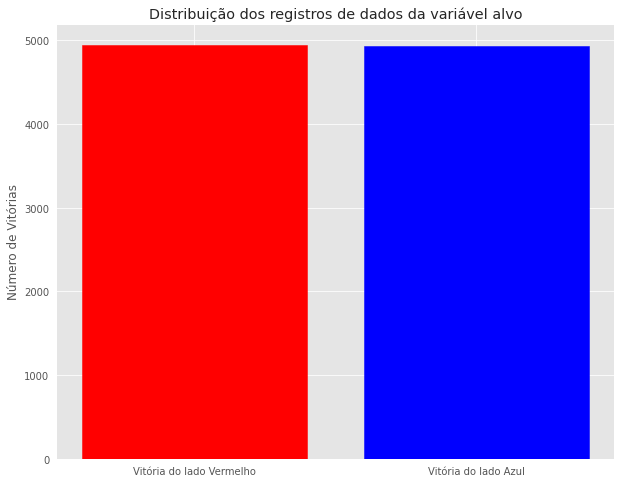

In [88]:
#Gráfico para a distribuição dos registro de dados

#Configurações
labels = ['Vitória do lado Vermelho', 'Vitória do lado Azul']
vitoria_vermelho = len(df.blueWins[df['blueWins']==0])
vitoria_azul = len(df.blueWins[df['blueWins']==1])
vitorias = (vitoria_vermelho, vitoria_azul)

#Plotar o gráfico
fig = plt.figure(figsize=(10,8))
ax = plt.bar(labels, vitorias)
plt.ylabel('Número de Vitórias')
plt.title('Distribuição dos registros de dados da variável alvo')
ax[0].set_color('red')
ax[1].set_color('blue')
plt.show()

In [89]:
#Contagem dos registros da coluna alvo (blueWins)
df.blueWins.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

Apesar do time vermelho ter ganho 19 jogos a mais do que o time azul, isso apenas para os aproximadamente 10k jogos classificados (SOLO QUEUE) de um ELO alto (DIAMOND I para MASTER), nossa variavel alvo possui uma distribuição considerada igualitária, porém, se caso tivéssemos dados desbalanceados, deveriamos balanceá-los primeiro.

E as técnicas mais comuns para balanceamento de dados é através de reamostragem (resampling). Podendo ser feito de duas formas básicas:

* Undersampling: removemos dados da classe majoritária;
* Oversampling: reamostramos dados da classe minoritária;


Obviamente, existiriam muitas outras tarefas a serem realizadas, mas infelizmente, esse conjunto de dados, não é um conjunto de dados que apresenta muitos problemas nos registros de seus dados, logo, não é necessária uma limpeza profunda do conjunto dos dados.

###**Outliers**


Os outliers, são os famosos "pontos fora da curva" ou observações que não parecem seguir o mesmo padrão dos demais dados. Normalmente apresentando distribuições diferentes. Identificar e tratar os outliers é de suma importância, devido que os outliers influenciam diretamente nas análises e nos algoritmos, ao apresentar comportamento distoante do resto do data set. 

Impactando tanto na média e variância, como nas funções de perda e custo.

Após os outliers terem sido identificados, sua remoção ou transformação só deve ser feita se realmente fizer sentido, logo, deve ser levado em consideração que alguns outliers são dados autenticos e devem ser estudados com atenção, para saber se de fato deve ser feita sua remoção

Novamente vamos utilizar o método describe, agora mais focado em tentar identificar se existem dados discrepantes no conjunto de dados. Então, ao analisar o resultado estatistico fornecido pelo método describe, precisamos observar o quão os valores, por exemplo, de 75% e o valor máximo estão distantes. 

In [90]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


Após observar os valores retornados pelo método describe, é interessante analisar de forma individual a coluna de Wards Colocadas (blueWardsPlaced e redWardsPlaced).

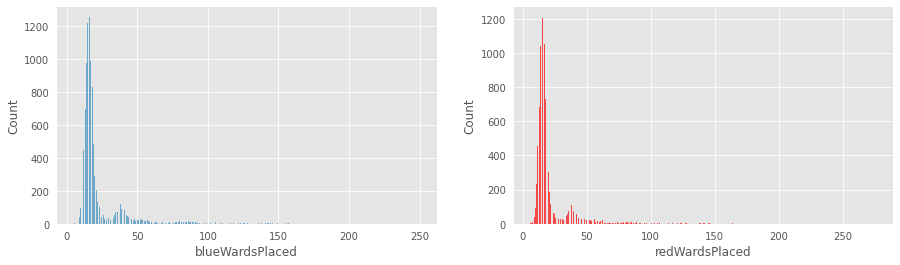

In [91]:
dados = df[['blueWardsPlaced', 'redWardsPlaced']]

fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.histplot(x="blueWardsPlaced",data=dados,ax = ax[0])
sns.histplot(x="redWardsPlaced",data=dados,ax = ax[1],color="r")
plt.show()

Lembrando que nosso conjunto de dados está representando apenas os 10 minutos iniciais de partida, logo, não é normal colocar mais de 12 sentinelas nos primeiros dez minutos, então isso acaba sendo estranho, com possivelmente alguns ouliers no conjunto de dados.


O nosso objetivo é avaliar se realmente existe outliers na coluna de wards colocadas, e se sua remoção deve ser feita. Para identificar a presença de outliers é prciso analisar, entender e verificar a distribuição dos dados, como fizemos com o gráfico de histograma, mas é possivel ter um entendimento ainda melhor com gráfico o de boxplot.

####**Boxplot**

Box plots são gráficos para visualização da distribuição de uma variável através de seus quantis. Sendo uma forma ágil de enxergar a distribuição dos dados, sem ter que recorrer a histogramas ou gráficos de densidade. 

O seu gráfico em forma de retângulo contém barras que se prolongam para fora dele, e os dados mais extremos, ou seja, os outliers, são mostrados como pontos fora do alcance das suas barras (os whiskers). 

Para entendermos melhor como funciona a análise de um box plot e a identificação de outliers, observe a figura abaixo:



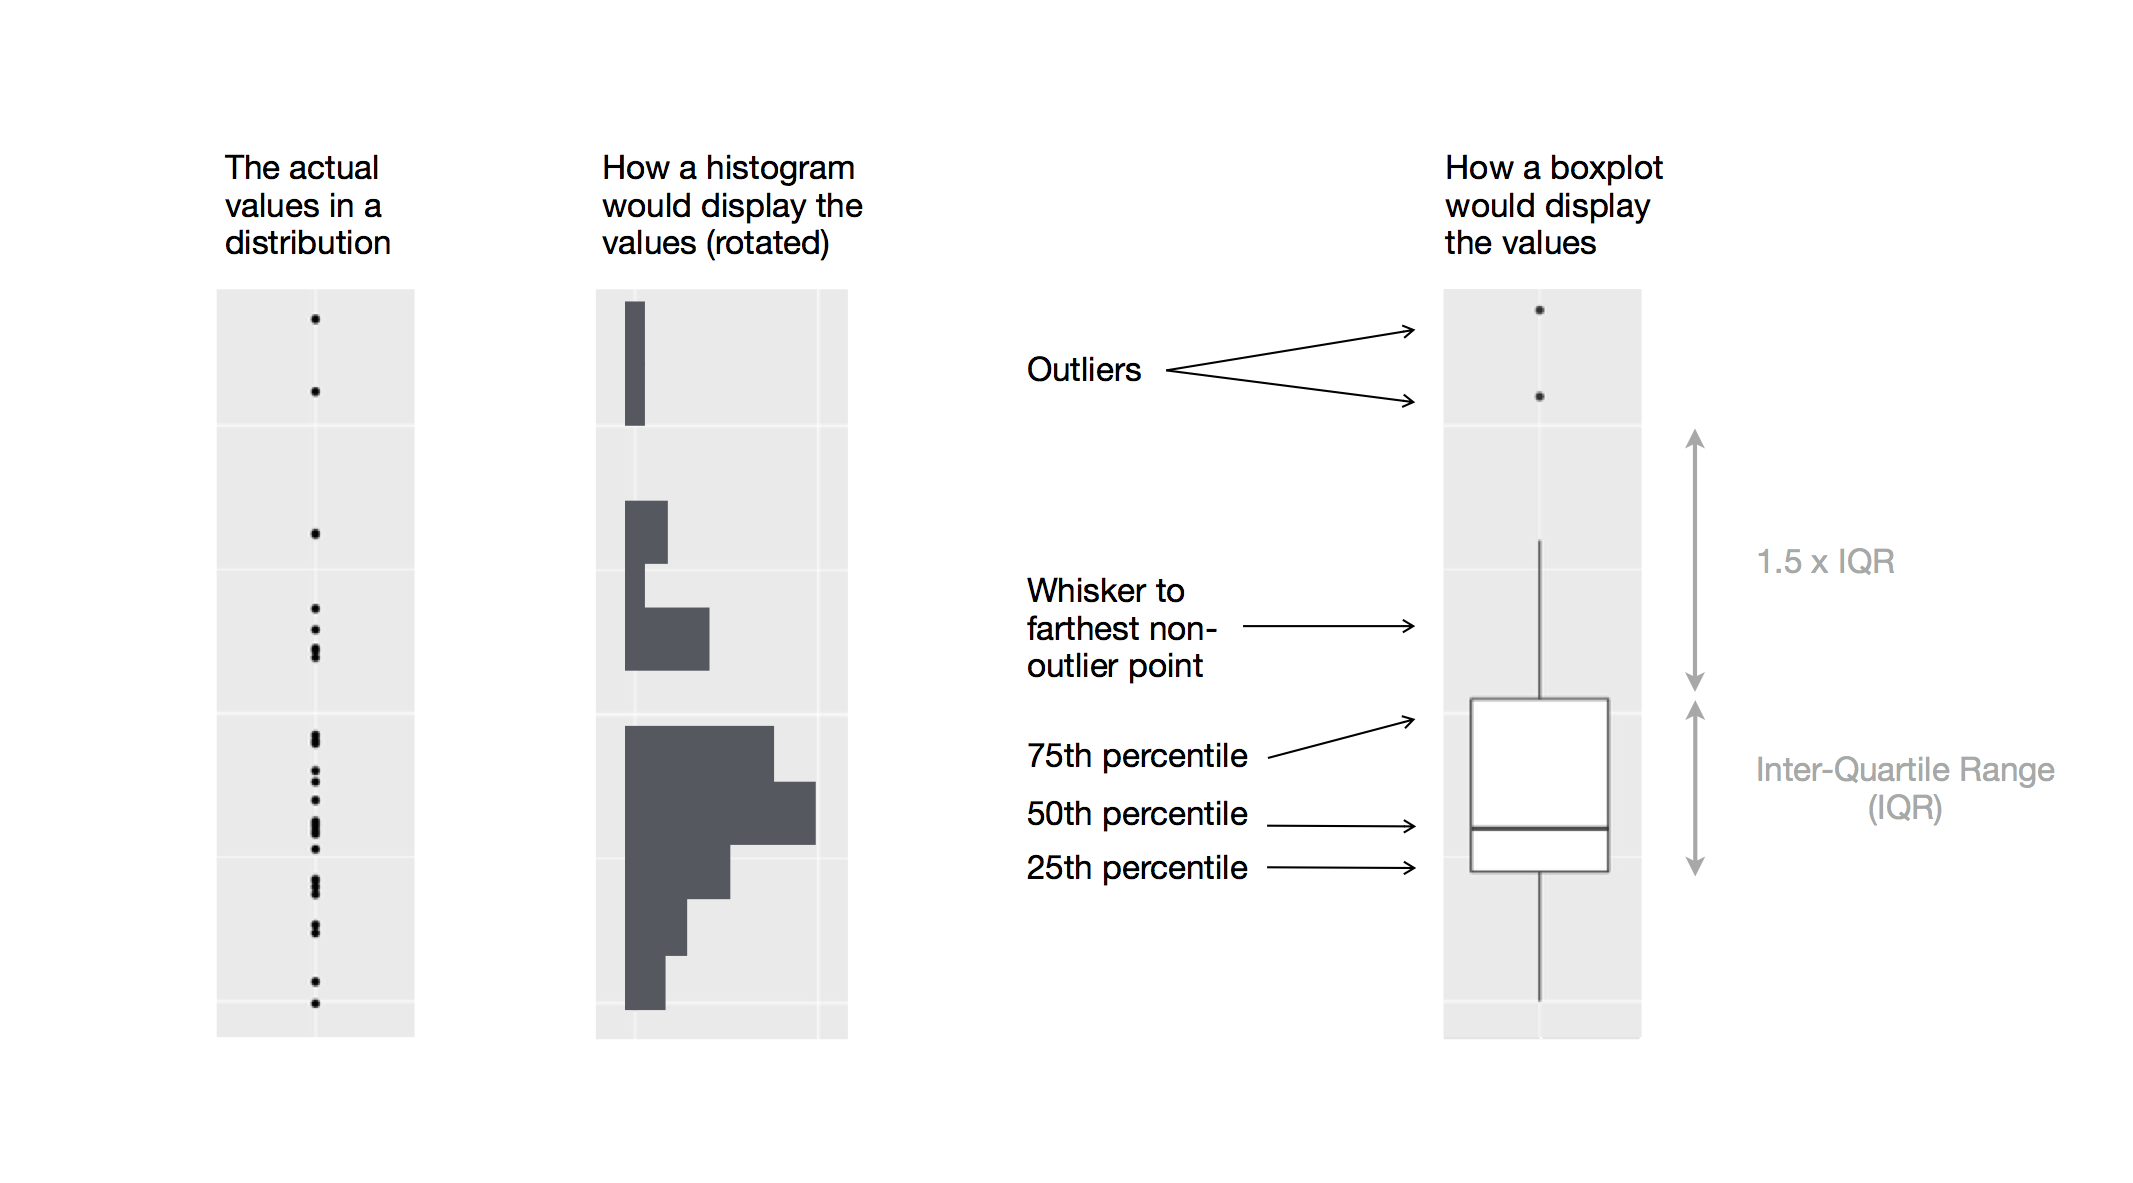

Tudo que estiver acima do intervalo (limite superior) $[Q3 + 1.5 \times \text{IQR}]$ e abaixo do intervalo (limite inferior) $[Q1 - 1.5 \times \text{IQR}]$será considerado um outlier.

Considere:

* Q3 e Q1 = Terceiro quantil e Primeiro quantil.
* IQR = Intervalo interquartil (Q3 - Q1).

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


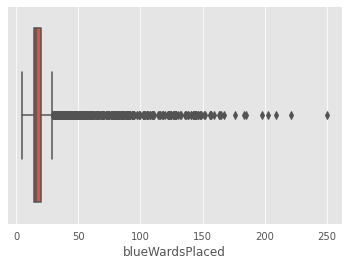

In [92]:
#Plotando gráfico de boxplot para o lado azul
sns.boxplot(x=df["blueWardsPlaced"], orient="vertical");

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


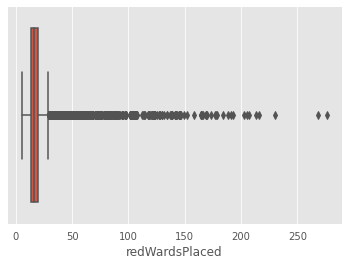

In [93]:
#Plotando gráfico de boxplot para o lado vermelho
sns.boxplot(x=df["redWardsPlaced"], orient="vertical");

Neste caso da coluna de wards colocadas é possivel observar que existe muitos pontos (outliers) fora do alcance das barras do boxplot. Então, irei apicar uma abordagem para identificar quais são esses pontos e se sua remoção deverá ser feita.**negrito**

Primeiro vamos identificar possíveis outliers para o **lado azul**:

In [94]:
#Construindo o intervalo interquartil
q1 = df.blueWardsPlaced.quantile(0.25)
q3 = df.blueWardsPlaced.quantile(0.75)

iqr = q3 - q1

In [95]:
#Limite inferior [Q1−1.5×IQR]
out_low = q1 - 1.5 * iqr 
out_low

#Limite superior [Q3+1.5×IQR]
out_high = q3 + 1.5 * iqr 
out_high

print(f'''Limite ou intervalo inferior: {out_low} 
Limite ou intervalo superior: {out_high}''')

Limite ou intervalo inferior: 5.0 
Limite ou intervalo superior: 29.0


Agora que defini quais são os limites inferiores e superiores, é possivel identificar quais são os pontos que encontram-se fora desses limites ou intervalos, ou seja, que podem ser considerados outliers.

In [96]:
#Identificando os outliers presentes
outliers = df.blueWardsPlaced[(df.blueWardsPlaced < out_low) | (df.blueWardsPlaced > out_high)]
outliers

3       43
4       75
11      33
17      43
23      78
        ..
9861    36
9864    57
9865    34
9870    46
9875    54
Name: blueWardsPlaced, Length: 1627, dtype: int64

In [97]:
#Total de possiveis outliers presentes
outliers.count()

1627

Agora vamos identificar possíveis outliers para o **lado vermelho**:

In [98]:
#Construindo o intervalo interquartil para o lado vermelho
q1_red = df.redWardsPlaced.quantile(0.25)
q3_red = df.redWardsPlaced.quantile(0.75)

iqr_red = q3_red - q1_red

In [99]:
#Limite inferior [Q1−1.5×IQR]
out_low_red = q1_red - 1.5 * iqr_red 
out_low_red

#Limite superior [Q3+1.5×IQR]
out_high_red = q3_red + 1.5 * iqr_red 
out_high_red

print(f'''Limite ou intervalo inferior: {out_low_red} 
Limite ou intervalo superior: {out_high_red}''')

Limite ou intervalo inferior: 5.0 
Limite ou intervalo superior: 29.0


In [100]:
#Identificando os outliers presentes para o lado vermelho
outliers_red = df.redWardsPlaced[(df.redWardsPlaced < out_low_red) | (df.redWardsPlaced > out_high_red)]
outliers_red

5        36
6        57
14      102
28       65
37       40
       ... 
9863     37
9866     38
9872     60
9874     46
9877     66
Name: redWardsPlaced, Length: 1667, dtype: int64

In [101]:
#Total de possiveis outliers presentes
outliers_red.count()

1667

Observe que para o lado vermelho, a quantidade de possíveis outliers foi ainda maior.

####**Remoção de Outliers (Quanto de wards dá pra colocar em 10min de partidas)**

ESCREVER pesquisar sobre e decidir se deve remover ou não

## **Exploração e Visualização de dados**

Segundo o esatístico John Tukey, a etapa de exploração de dados ou EDA pode ser definida como: 

*Procedimentos para analisar dados, técnicas para interpretar os resultados de tais procedimentos, formas de planejar a reunião dos dados para tornar sua análise mais fácil, mais precisa ou mais exata e toda a maquinaria e os resultados da estatística (matemática) que se aplicam a análise de dados.*






A exploração de dados ou EDA pode ser considerada uma das fases mais importantes de todo processo de análise de dados. A partir dela começamos a entender mais sobre os dados que envolve a problematica e conseguentemente construir hipoteses e perguntas. Nessa fase, para ajudar no trabalho de entendimento e exploração dos dados é feito o uso de ferramentas estatísticas e de visualização de dados, para que as informações a respeito dos dados sejam a mais clara possivel. Não deve ser levado em consideração um conjunto de regras e passo a passo na hora de construir a análise exploratoria de dados, pelo contrario, a análise exploratória de dados não se trata de um processo formal e sim um estado de espirito investigativo. Na EDA o mais importante é investigar todas as ideias que ocorrerem, conforme o entendimento e significado dos dados vai aumentando.

Pode-se dizer que a EDA é um ciclo iterativo e ciclico, onde:

* É preciso gerar questões relevantes para o negócio, logo, é essencial que em casos reais exista uma conversa com o pessoal da aréa de negocio, a respeito dos dados e oque o pessoal da área de negócio está buscando responder através do conjunto de dados.

* Para encontrar as respostas dos questionamentos levantados é preciso gerar gráficos, manipulação e estatística sobre os dados.

* Refinar os questioanamentos e utiliza-los para gerar novos questionamentos pertinentes. 

Um fator essencial que muita das vezes é negligenciado por quem está começando na área dos dados é a estatistica. A estatística tanto univariada como multivariada é de suma importância para os dados ganharem ainda mais significado, durante a exploração de dados.



---



**Visualização de dados**

Após os dados serem transformados em informação na análise exploratória de dados, a informação ainda precisa se tornar útil para outras pessoas e conseguentemente pode ser utilizada, logo, a visualização de dados tem a responsabilidade de tornar a informação útil e de fácil entendimento, para que outras pessoas possam usar a informação. 
A etapa de visualizacao de dados está dentro da exploração de dados, com o objetivo de transmitir a informação retiradas dos dados e trata-se de uma das etapas mais importantes da análise exploratória. 

A visualização de dados pode ser definida dentro da ciência de dados como, "A formação de imagens visuais mentais para transmitir informações através de
representações gráficas de dados". De acordo com o Edward Tufte que é pioneiro no campo do desenvolvimento de visualizações efetivas e escreveu vários livros sobre o assunto, uma boa visualização de dados precisa seguir três regras: 

* Integridade gráfica
* Maximizar a proporção de dados e tinta
* Evitar lixo gráfico.

A integridade gráfica está relacionada a parte obscura da visualização de dados, onde não devemos através da visualização de dados e estatística buscar
enganar ou trapacear quem está visualizando o gráfico.

Para a regra de maximizar a proporção de dados e tintas deve ser levado em conta que quanto mais simples e claro um gráfico for, melhor, o famoso "menos é mais". Um dos problemas principais que envolvem a regra de maximização são os famosos gráficos de pizza e 3D. O principal problema de um gráfico de pizza e 3D são suas análises ser de difícil entendimento, tendo em vista, que não somos bons em fazer comparações de área.

A terceira regra de evitar lixo gráfico se trata de evitar elementos visuais estranhos ou que não tenham nenhum objetivo e que possam acabar distraindo quem está visualizando o gráfico, por mais que pareça algo simples, é essencial.



Agora de fato, e finalmente, vamos começar a explorar e construir visualizações de dados

###**Estatística Descritiva Univariada**

Uma das estatística que se pode aplicar na EDA é a estatística descritiva univariada. A estatítica descritiva univariada pode ser aplicada quando se está interessado em estabelecer medidas que resumem quantitivamente uma variável, logo, essas medidas dirão sobre a tendência de centralidade dos dados e suas dispersões. 

**E a partir de agora vamos ter um foco maior para identificar as variaveis que podem ser uteis para a vitória do lado azul.** Realizando uma análise das variaveis para vitórias do lado azul, dessa forma conseguiremos identificar quais são as variaveis que devemos utilizar na construção do nosso modelo de machine learning.


---






Vamos agora avaliar algumas distribuições para quando o time do lado azul venceu, e começar a entender a importância das variaveis que serão uteis para o nosso modelo. Se identificarmos as variaveis que mais ajudam o time do lado azul a vencer, e alimentar o treinamento do modelo com essas variaveis, possivelmente o modelo terá um bom desempenho e precisão.


<Figure size 7200x1728 with 0 Axes>

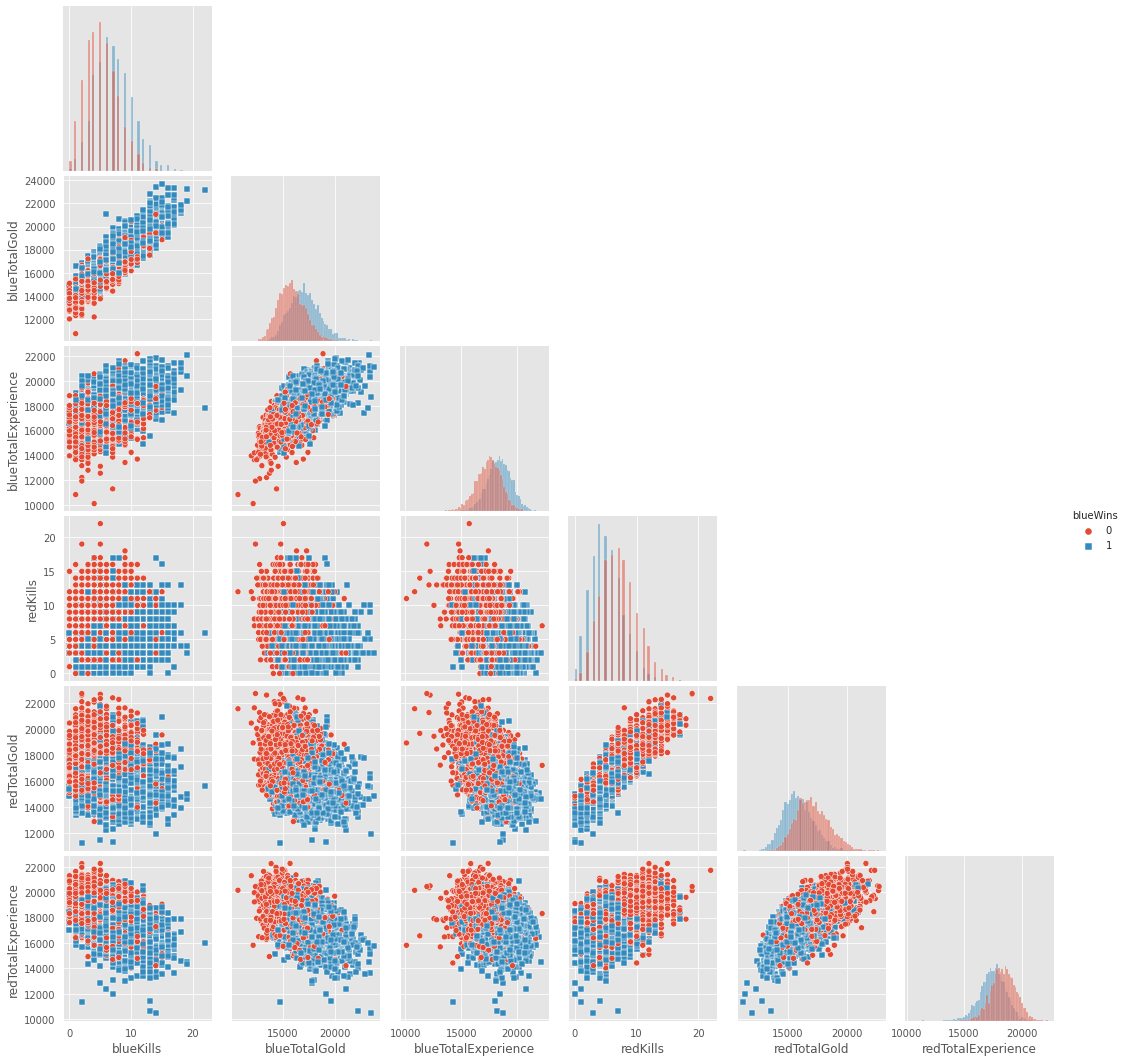

In [102]:
#Primeiramente vamos analisar as distribuições das seguintes variaveis:
x_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]
y_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]

plt.figure(figsize=(100,24))
sns.pairplot(data=df, x_vars=x_vars,y_vars=y_vars, hue='blueWins', corner=True,markers=["o","s"],diag_kind="hist")

plt.show()


Como jogador do league of legends, faz sentindo o gráfico acima, onde quanto mais ouro, mortes e experiência uma equipe tem por jogo, maiores são as chances de vitória.

Quando um jogador abate o inimigo, além de obter mais experiência, ele irá obter ouro e consequentemente irá comprar itens mais caros e de forma mais rápida, obtendo vantagem e podendo chegar a vitória. Isso também se aplica aos outros recursos do jogo como os minions de rota, wards e os monstros da selva. 

Todos esses são recursos imprescindível para se chegar a vitória, vamos avaliar a distribuição dos dados para as outras variáveis. 

Lembrando que avaliar e entender a comparação dessas variaveis e como estão distribuidas, é de suma importância para a construção do modelo. Entender quais são as variaveis que inplicam no resultado positivo do valor da variavel target (alvo), neste caso a variavel blueWins.

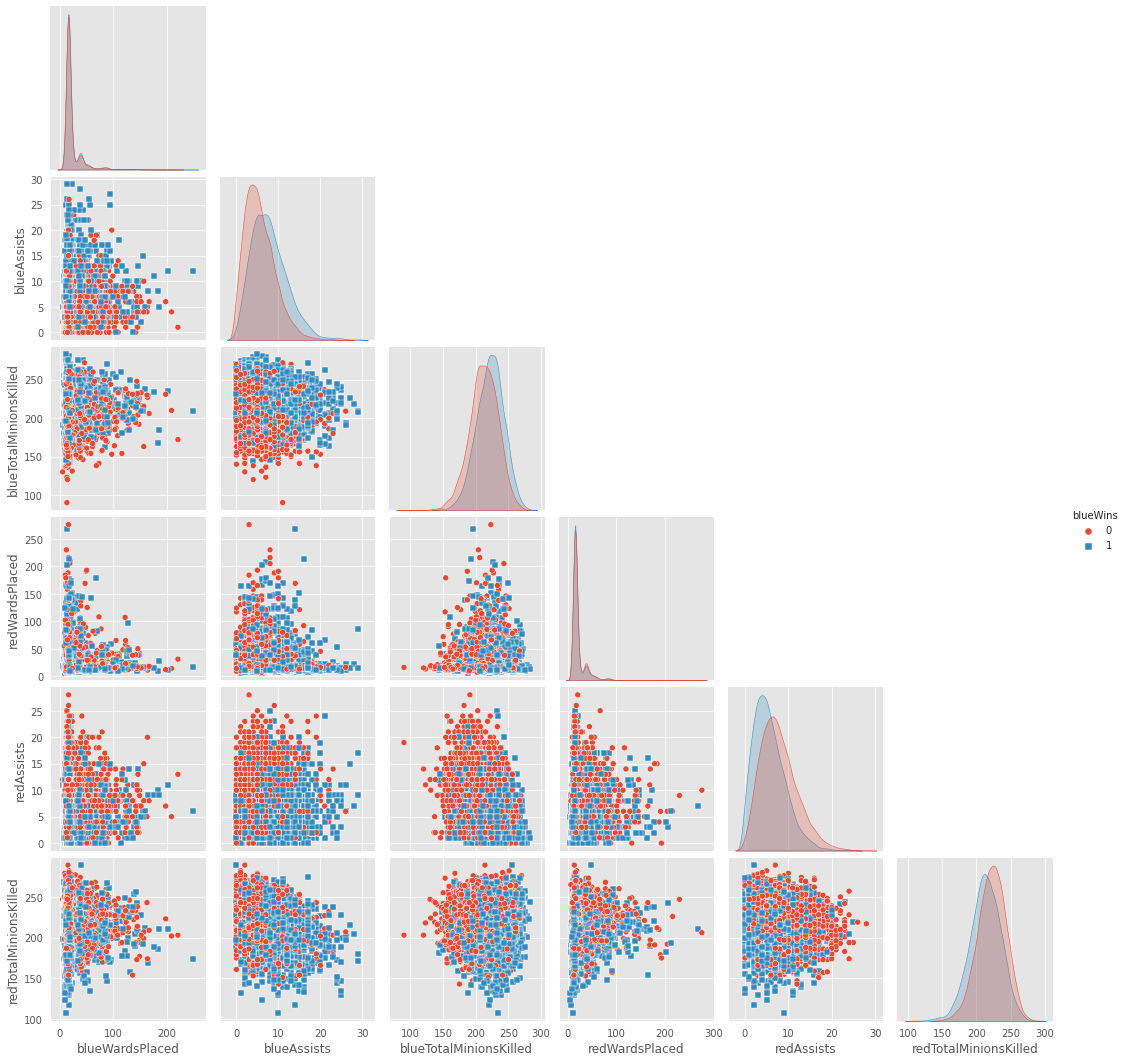

In [103]:
#Agoras vamos analisar e entender as distribuições dos dados das seguintes variaveis:
x_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]
y_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]

sns.pairplot(data=df,x_vars=x_vars,y_vars=y_vars,hue="blueWins",corner=True,markers=["o","s"])
plt.show()

Repare na variavel de minions totais abatidos e veja que a quantidade maior está relacionada ao time que saiu vitoriso, algo que as vezes, principalmente, no baixo elo das ranqueadas não é visto como algo que impacta tanto no jogo. Principalmente após os 10min de partidas, o abate de minions tende a diminuir mais.

Agora vamos contruir um gráfico de Violino e Box Plot para visualizar as variaveis com mais potenciais de vitoria do time que está jogando no lado azul. Os gráficos de violino nos permitem visualizar a distribuição de cada recurso de forma simples e pontos de dados separados com base no resultado final de um jogo.

In [126]:
#Construindo uma lista para apenas trabalharmos com o lado azul
drop_cols = ['blueWins','redFirstBlood','redKills','redDeaths','redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']

#Algumas configurações
x = df.drop(drop_cols, axis=1)
y = df.blueWins

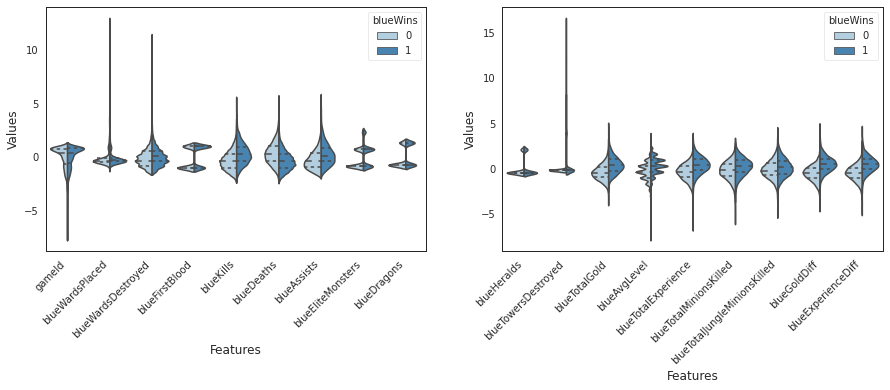

In [127]:
# Copy feature matrix and standardise
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Create violin plot of features
#plt.figure(figsize=(8,5))
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True,
               inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

# Create violin plot
#plt.figure(figsize=(8,5))
sns.violinplot(x='Features', y='Values', hue='blueWins', 
               data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)

plt.show()


Observações a serem feitas:

* Blue kills parece ter um grande impacto positivo na vitória do jogo.
Da mesma forma, as mortes azuis têm um grande impacto negativo na vitória do jogo (ou seja, positivo na derrota).

* Blue assiste enredo semelhante a blue kills, precisa obter kills para obter assistências para escalar com kills.

* O primeiro abate está positivamente correlacionado com o resultado, mas também reflete mortes pelo azul.

* As diferenças de ouro e experiência têm grande influência.

* Monstros da selva parece não ter muito impacto

####**Kill / Death / Assist (KDA)**

As primeiras colunas que vamos observar são as colunas que podem ser utilizadas mais pra frente na Engenharia de Recursos, para criar novas variaveis para o nosso modelo, e que dessa forma ele tenha um melhor aprendizado.

É comumente utilizado como métrica de análise de vitória, principalmente nos campeonatos de League of Legends, o famoso KDA. Mas como funciona o cálculo do KDA e por que isso importa em qual time irá vencer? O KDA basicamente funciona como a média de abates e assistências por mortes. 

Uma engenharia de recursos básicos adicionada
Em league of legends, então podemos adicionar um recurso chamado KDA, que é representado como KDA = (Kills + Assistências) / Mortes. Então uma nova colunca KDA, será adicionada para cada equipe dentro do conjunto de dados.

Text(0.5, 1.0, 'Win % by KDA ratio')

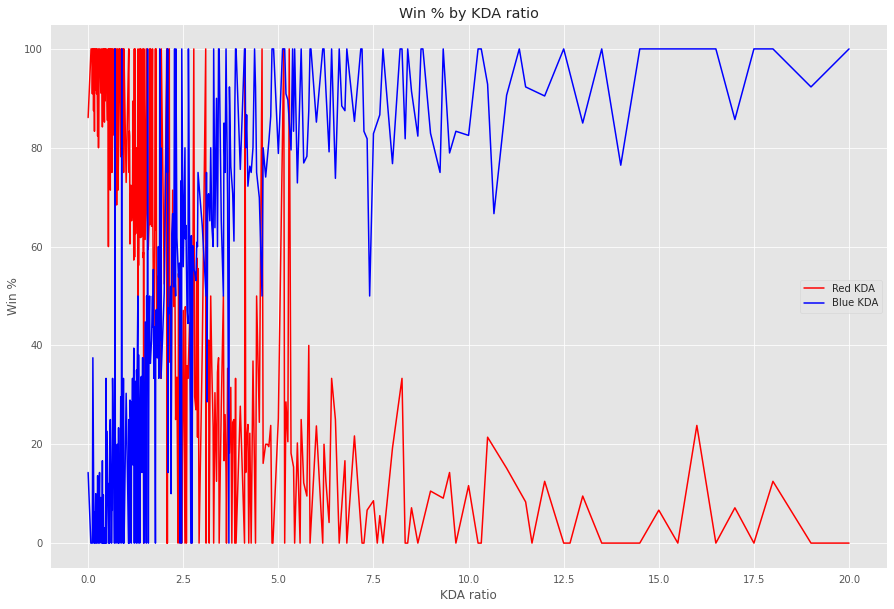

In [106]:
#Formula do KDA
df['blueKDA'] = ((df["blueKills"] + df["blueAssists"]) / df["blueDeaths"])

df['redKDA'] = ((df["redKills"] + df["redAssists"]) / df["redDeaths"])


# Group all KDA's for each team
df_redKDA = df[(df['redKDA'] <= 20)].groupby(by=['redKDA'])
df_blueKDA = df[(df['blueKDA'] <= 20)].groupby(by=['blueKDA'])

# Calculate probability of winning according to KDA
# Frequency of winning according to KDA / Frequency for each KDA * 100
redKDA_rate = (df_redKDA.blueWins.sum() / df_redKDA.blueWins.count() * 100)
blueKDA_rate = (df_blueKDA.blueWins.sum() / df_blueKDA.blueWins.count() * 100)

fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data=redKDA_rate, label='Red KDA', color='red')
sns.lineplot(data=blueKDA_rate, label='Blue KDA', color='blue')
ax.set_xlabel('KDA ratio')
ax.set_ylabel('Win %')
ax.set_title('Win % by KDA ratio')

Observe que o intervalo 0,0 - 5,0 nos mostra as razões KDA mais comuns obtidas em jogos classificados como diamante. Além disso, ajuda as equipes / jogadores a verem como, quando a proporção de KDA da equipe azul aumenta, a probabilidade de a equipe vermelha vencer diminui rapidamente

Através do site de estatísticas GOL.gg, do último CBLOL (Campeonato Brasileiro de League of Legends) é possivel de observar que o top3 de jogadores com maiores KDA, pertencem aos dois time que conseguiram chegar na final do campeonato. 

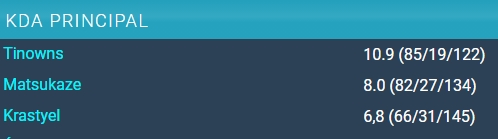

####**Gold por minuto e Abates**

Quem não lembra do famoso ex-jogador Yoda, falado a frase iconica em sua análise "aquele famoso 10 de farm por minuto, 100 de farm a cada minuto", o que na verdade seria 10 de farm por minuto e 100 de famr para cada 10 minuto de partida. Que é o que está representando no nosso conjunto de dados, os 10 primeiros minutos de partida. Mas o quanto será que farmar e ganhar ouro por cada minuto chega a ser impactante, e se realmente isso dar a um time uma condição de vitória. Somado a isso também vamos observar a porcentagem de kills, então o que queremos saber é se a taxa de abates e ouro por minuto impacta na vitória.

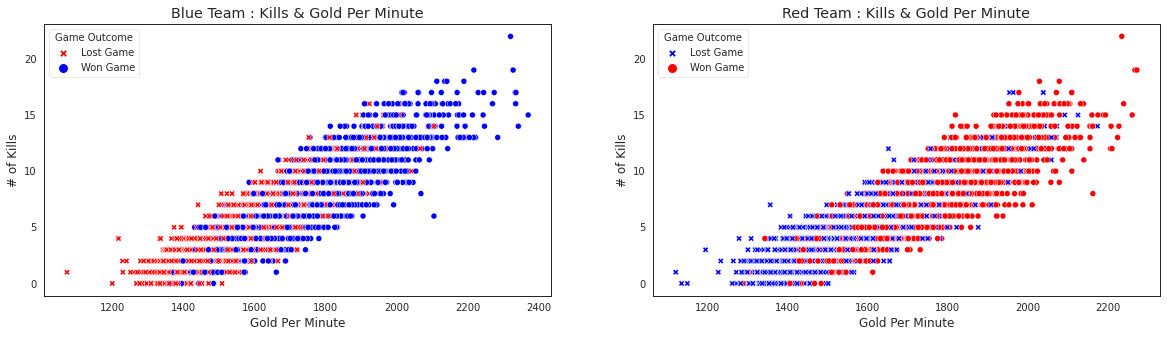

In [107]:
from matplotlib.lines import Line2D

mark1 = {0:"X", 1:"o"}
mark2 = {0:"o", 1:"X"}

legend_elements_1 = [Line2D([0],[0],marker='X',color='w',label='Lost Game',markerfacecolor='red',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Won Game',markerfacecolor='blue',markersize=10)]
legend_elements_2 = [Line2D([0],[0],marker='X',color='w',label='Lost Game',markerfacecolor='blue',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Won Game',markerfacecolor='red',markersize=10)]

plt.subplots(figsize=(20,5))
sns.set_style("white")

plt.subplot(1,2,1)
ax1 = sns.scatterplot(data=df,x='blueGoldPerMin',y='blueKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark1)
ax1.set_title('Blue Team : Kills & Gold Per Minute')
ax1.set_xlabel('Gold Per Minute')
ax1.set_ylabel('# of Kills')
ax1.legend(title='Game Outcome',handles=legend_elements_1,loc='upper left')

plt.subplot(1,2,2)
ax2 = sns.scatterplot(data=df,x='redGoldPerMin',y='redKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark2)
ax2.set_title('Red Team : Kills & Gold Per Minute')
ax2.set_xlabel('Gold Per Minute')
ax2.set_ylabel('# of Kills')
ax2.legend(title='Game Outcome',handles=legend_elements_2,loc='upper left')

plt.show()

Vemos que independente do lado, o famoso farme por minuto é imporante durante os jogos e faz diferença para garantir a vitória.

Acima, temos gráficos de dispersão para o desempenho de cada equipe durante os jogos que ganharam / perderam. O eixo x representa a média de ouro por minuto e o eixo y representa o número de mortes. Em ambos os gráficos de dispersão, vemos o mesmo padrão do número mais alto que a mata e a média de ouro por minuto alcançada por uma equipe, geralmente leva à vitória do jogo.

####**Taxa de vitória por eliminação de objetivos**

Algo básico que todo jogador de league of legendes sabe é que o mais importante dentro do jogo é o controle  realização de objetios, como dragão e arauto, mas o quanto eles podem ser relevantes para a vitória de um time do lado azul...

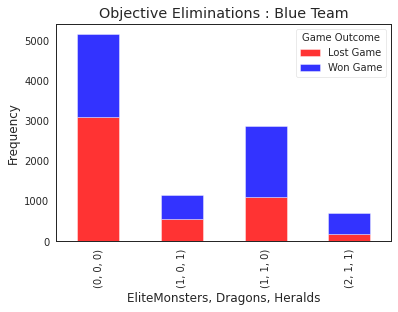

In [108]:
obj_blue = pd.crosstab([df['blueEliteMonsters'],df['blueDragons'],df['blueHeralds']],df.blueWins.astype(bool))

ax_blue = obj_blue.plot(kind='bar', stacked=True, label='Game Outcome', color=['red', 'blue'], alpha=0.8)
ax_blue.set_xlabel('EliteMonsters, Dragons, Heralds')
ax_blue.set_ylabel('Frequency')
ax_blue.set_title('Objective Eliminations : Blue Team')
ax_blue.legend(["Lost Game", "Won Game"], title="Game Outcome")


O gráfico empilhado mostrado acima contém valores relativos às eliminações de objetivos para monstros de elite. Conforme mencionado na seção 2.1, esses monstros de elite são dragões e arautos.

Ao eliminar esses monstros de elite, um time / jogador ganhará regalias que lhe darão vantagens, como aumento da distribuição de dano ou regeneração de saúde mais rápido. Os gráficos empilhados mostrados acima mostram o claro impacto que esses monstros de elite têm sobre a vitória.

In [109]:
#Tabela
obj_blue

blueWins                                   False  True 
blueEliteMonsters blueDragons blueHeralds              
0                 0           0             3101   2055
1                 0           1              564    583
                  1           0             1096   1770
2                 1           1              188    522

Se dividirmos a tabela em porcentagens, teremos:

* 0 monstros de elite: ~ 40% de taxa de vitória
* 1 arauto (0 dragões): taxa de vitória de ~ 50%
* 1 dragão (0 arautos): taxa de vitória de ~ 60%
* Arauto e dragão: taxa de vitórias de ~ 70%

Os jogadores / equipes, mas principalmente os jogadores de função 'Selva', devem tomar nota dessas porcentagens e levar em consideração o controle e realização desses objetivos, para chegar a vitória, algo que já é comum nos altos níveis de ranqueada. Algumas coisas a serem destacadas:

* Se nenhum monstro de elite for obtido nos primeiros 10 minutos de jogo, cerca de 60% das vezes eles perderão.
* Um 'jungler' deve priorizar a eliminação de um dragão antes de um arauto, pois um dragão parece ter uma taxa de vitória de 60%.
* De cerca de 5.000 partidas com classificação de diamante em que o time azul venceu, apenas em ~ 700 jogos o time azul foi capaz de eliminar um dragão e um arauto nos primeiros 10 minutos. Mais importante ainda, nos jogos em que isso ocorreu, ~ 70% deles resultaram em uma vitória. Portanto, como uma equipe, seria altamente recomendável ajudar seu jogador de função da 'selva' a eliminar esses monstros de elite.

###**Exploração multivariada**

Novamente, o foco está em analisar e identificar as variaveis que inplicaram no valor positivo da variavel target, neste caso na vitória dos times que jogaram pelo lado azul do mapa.

Agora vamos tentar ter um primeiro entendimento das variaveis que possivelmente se correlacionam e impactam na vitória do lado azul. Encontrar essas variáveis é de extrema importância para quando formos construir o nosso modelo. 

Na análise multivariada, consideramos duas ou mais variáveis simultaneamente, e como elas se relacionam. Então, estamos interessados em verificar como a variação de uma variável influencia as demais e quais seus efeitos conjuntos.

In [141]:
#configuracoes
vars_ladoazul = df.corr()[df.corr()['blueWins'] >= 0.07].index.values

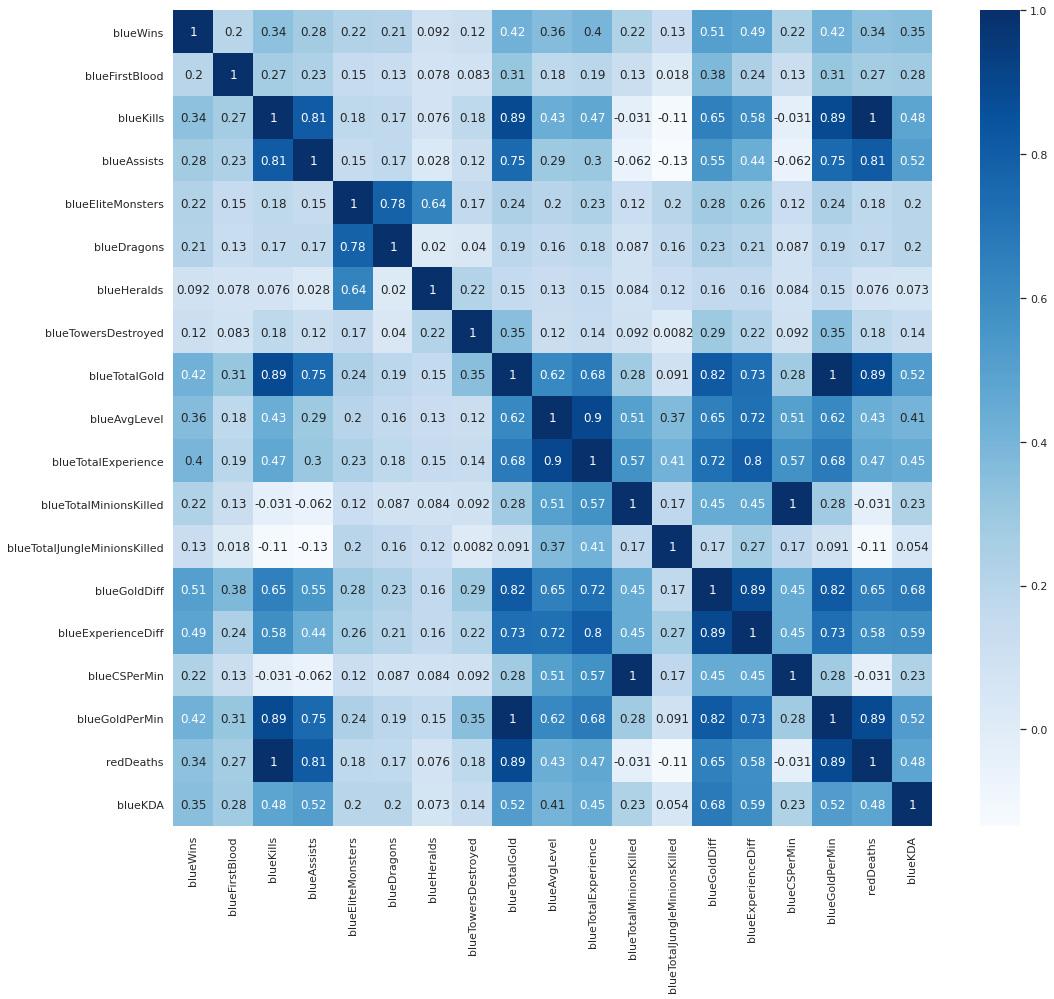

In [142]:
plt.subplots(figsize=(17,15))
plt.pcolor(df[vars_ladoazul].corr())
plt.xticks(np.arange(0, len(vars_ladoazul), 1), vars_ladoazul)
plt.yticks(np.arange(0, len(vars_ladoazul), 1), vars_ladoazul)
plt.xticks(rotation=90)

#Plotando o gráfico
sns.heatmap(df[vars_ladoazul].corr(),cmap="Blues",annot=True)
plt.show()

O mapa de calor impresso acima contém valores correlatos que pertencem a nossa variável targe blueWins. 

Os retângulos mais escuros indicam alta correlação positiva (mais próxima de 1, enquanto os retângulos mais claros indicam alta correlação negativa (mais próxima de -1). 


E podemos observar que na diagonal, os quadrados representam a correlação de uma variável com ela mesma, por isso possui uma forte correlação positiva.Excluindo essas variáveis, ainda existem outras 6 variaveis com um valor de correlação de positiva (igual a 1), sendo:

* 'redDeaths'
* 'blueKills'
* 'blueCSPerMin'
* 'blueTotalGold'
* 'blueGoldPerMin'
* 'blueTotalMinionsKilled'

Para essas variáveis que encontramos com um valor de correlação igual a 1, ou seja, um valor de correlação alto, iremos produzir o gráfico de distribuição (estimativa de densidade do kernel + histograma) para nos ajudar a visualizar a importância significativa de cada uma deles para a vitória do lado azul.


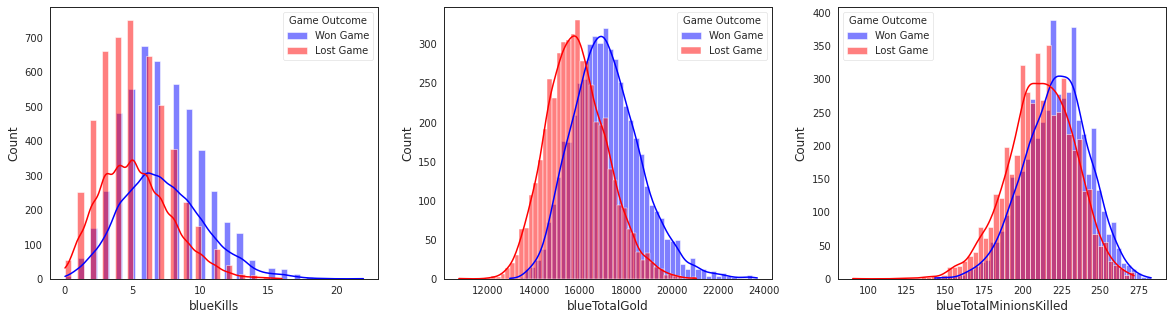

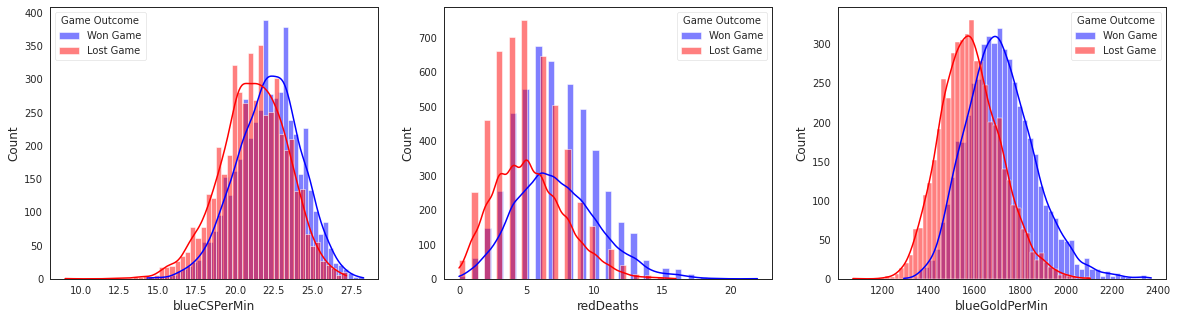

In [111]:
corr_blue = ['blueKills', 'blueTotalGold', 'blueTotalMinionsKilled', 'blueCSPerMin', 'redDeaths', 'blueGoldPerMin']

df_win  = df[df["blueWins"]==1]     # Blue Team Win  /  Red Team Lost
df_lose = df[df["blueWins"]==0]     # Red Team Win   /  Blue Team Lost

c = 0
plt.subplots(figsize=(20,5))
for i in corr_blue:
    plt.subplot(1,3,c+1)
    sns.histplot(df_win[i],label='Won Game',color='blue', kde=True)
    sns.histplot(df_lose[i],label='Lost Game',color='red', kde=True)
    plt.legend(title='Game Outcome')
    c=c+1

    if c == 3:
        plt.show()
        if i != corr_blue[len(corr_blue) - 1]:
            plt.subplots(figsize=(20,5))
        c=0

Os gráficos de distribuição mostrados acima ajudam as equipes / jogadores a visualizar a importância desses atributos e quanto maiores são os valores desses atributos, maiores são as chances de uma equipe vencer o jogo. Os jogadores / equipes podem ajustar sua estratégia usando os valores médios exibidos nos gráficos acima como uma medida de sucesso nos primeiros 10 minutos de jogo.

ESCREVER O QUE EU PUDE ABSORVER COM O GRAFICO

Fazer uma análise exploratória de dados sempre deve ser levado como objetivo gerar **Perguntas** e **Hipoteses**. Logo, irei definir algumas perguntas e hipoteses que tenho inicialmente e responder durante a análise exploratoria de dados, para reter uma informação inicial dos dados. Como já dito anteriormente, durante a análise exploratoria de dados surgem mais perguntas, conforme os dados vão ganhando significado e o entendimento a respeito dos dados vai aumentando. Então, é sempre bom começar com perguntas simples e ir aumentando suas complexidades conforme se vai conhecendo os dados, o que também é um dos objetivos da análise exploratória de dados, você tomar conhecimento dos seus dados. Vale lembrar que quando se lida com um novo conjunto de dados, nem sempre tem informações disponiveis sobre os dados, sendo necessario buscar o conhecimento de uma pessoa especialista no assunto, conversar com estas pessoas influenciará e ajudará em perguntas futuras, tendo em vista que não é possivel gerar perguntas sem entender a problematica que envolve os dados e o meio que os dados estão envolvidos, muito menos sem entender o conjunto de dados em si. Nos casos reais, em sua maioria das vezes o pessoal da área de negocios que tem um maior entendimento da problematica e área que envolve os dados, além do conjunto de dados, por isso são os principais responvaveis por gerarem as perguntas que se deseja responder na análise exploratoria de dados.

A análise exploratoria deve se chegar ao fim quando for identificado que já se atingiu o objetivo desejado e os questionamentos principais já foram respondidos, sendo em casos reais responsabilidade do pessoal da área de negócios, que são os responsáveis por fazerem os questionamentos a respeito dos dados, além de na maioria das vezes terem um entendimento maior sobre os dados e a área que os mesmo estão envolvidos.

Como por exemplo poderiamos contruir uma etapa de teste de hipotese, porém não vamos focar nisso aqui no projeto, e por esse motivo acredito que as nossas conclusoes para a EDA e dúvidas sobre as variáveis se encerraram, então podemos começar a construção do nosso modelo de machine learning.

##**Modelagem e Avaliação de Modelos**

A primeira é pergunta que deve ficar clara é se estamos falando de um problema de classificação ou regressão? Isso, sem dúvidas irá ajudar na busca por um bom algoritmo... Neste caso, trata-se de um problema de classificação..

###**Seleção de Variaveis**

Utilizar a biblioteca Yellow, usada para selecionar variaveis (vista no desafio de selecao de variaveis)

Aqui definiremos qual modelo será usado em nosso projeto, ou seja, qual o que se aplica melhor ao nosso problema.

###**Feature Eng**

###**AutoML**

Estudar sobre Pycaret Classification, pycaret aplicado a problemas de classificação.. https://pycaret.org/classification/   e https://towardsdatascience.com/classification-with-pycaret-a-better-machine-learning-library-cff07a10a28c

A biblioteca em questão traz a abordagem AutoML, que é o processo de automatizar o processo de aplicação do aprendizado de máquina a problemas do mundo real. O AutoML cobre o pipeline completo do conjunto de dados bruto ao modelo de aprendizado de máquina. O AutoML foi proposto como uma solução baseada em inteligência artificial para o desafio cada vez maior de aplicar o aprendizado de máquina.

A principal vantagem de usar essa abordagem aqui é que PyCaret pode treinar e testar 20 tipos diferentes de modelos de classificação. Como a função a ser mapeada que relaciona o conjunto de dados à variável a ser estimada possui complexidade relativamente baixa, é muito provável que um desses modelos tenha um desempenho muito bom em nosso caso. (colocar referencia de wesley)



Dessa forma podemos observar quais algoritmos obtiveram melhores desempenhos...

###**Modelagem**

Testando outros modelos... (verificar notebooks que estão no kaggle desse dataset)

###**Avaliação**

colocar as métricas de avaliação do modelo de classificação como Matriz de confusão e explicar elas... https://github.com/luislauriano/Aceleracao_DataScience/blob/master/Semana%2009%20(Classifica%C3%A7%C3%A3o%20e%20Tensorflow)%20-%20Machine%20Learning/aula_9_classificacao.ipynb

##Referencias

https://github.com/w-alves/end-to-end-data-science/blob/main/%5BPT-BR%5D%20end-to-end-data-science-project.ipynb

https://www.kaggle.com/allanbruno/predicting-wins-based-on-early-game-75-accuracy

https://ojs.aaai.org/index.php/AIIDE/article/view/7449/7348
https://github.com/csci-599-applied-ml-for-games/league-of-legends-bot

https://youtu.be/5B2xIyKOnzc

material da codenation

**Criar deep learning do lol com base no artigo e projeto**

tps://dev.to/allands/how-machine-learning-made-me-win-more-on-league-of-legends-3on5)


SELECAO DE FEATURE: https://www.kaggle.com/hrideshkohli/advanced-feature-selection-analysis-classification

SELECAO DE FEATURE e PYCARET: **https**://www.kaggle.com/neelkudu28/league-of-legends-win-prediction-using-pycaret

EDA e DATA VIZ: **https**://www.kaggle.com/luisgarduno/data-visualization-lol-ranked-matches

https://www.kaggle.com/juanfelipe19/lol-classification

EDA: https://www.kaggle.com/nahumsa/analysing-legends

EDA ESTATISTICO: https://www.kaggle.com/christianmcb/league-of-legends-diamond-classification

GRÁFICO DA MÉTRICA ROC: https://www.kaggle.com/nahumsa/analysing-legends